<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/PCA_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import seaborn as sns
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset('penguins') # load data
df1 = df.copy()
df1.dropna(inplace=True) # eliminem els pingüins amb algun NaN
X = df1[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']] # data matrix
XS = StandardScaler().fit_transform(X) # scale data

pca = decomposition.PCA(n_components=4).fit(XS) # PCA

print(100*pca.explained_variance_ratio_.cumsum()) # Variance explained

[ 68.63389314  88.08682242  97.30288541 100.        ]


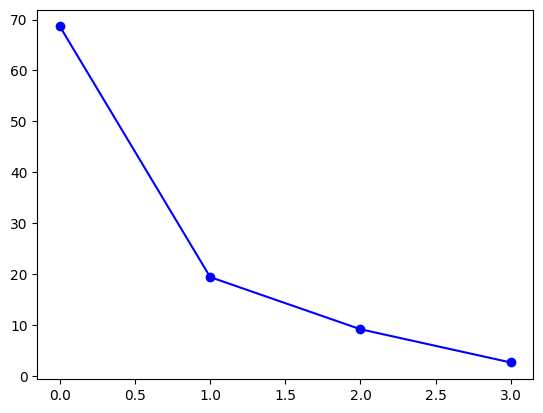

In [20]:
import matplotlib.pyplot as plt

plt.plot(100*pca.explained_variance_ratio_,'bo-') # Scree plot

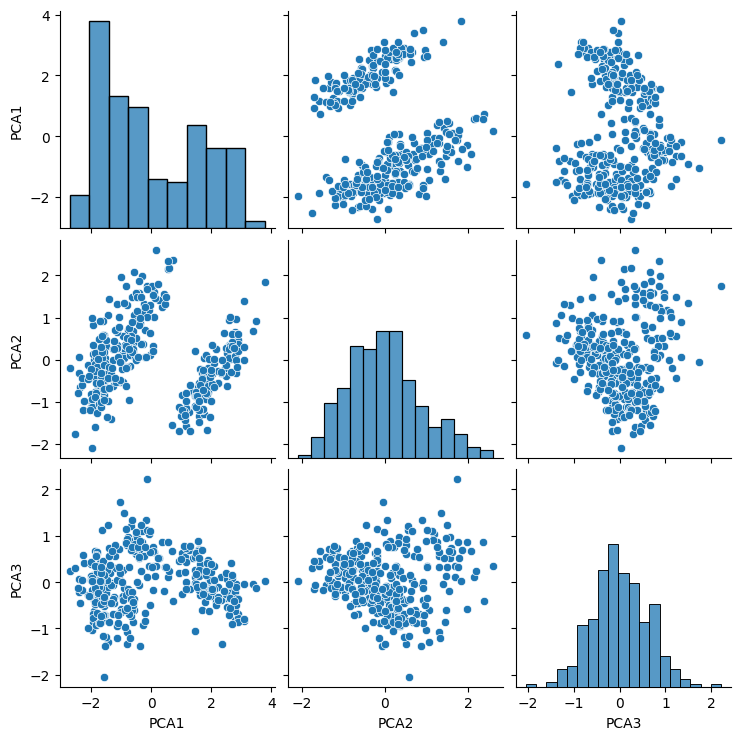

In [21]:
import pandas as pd

Xproj = pca.transform(XS)
XPCA = Xproj[:,0:3]

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
sns.pairplot(d)
plt.show()

In [25]:
XPCA.shape

(333, 3)

In [32]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters=3).fit_predict(XPCA)

d.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PCA1,PCA2,PCA3
0,-1.853593,0.032069,-0.234902
1,-1.316254,-0.443527,-0.027470
2,-1.376605,-0.161230,0.189689
3,-1.885288,-0.012351,-0.628873
4,-1.919981,0.817598,-0.701051


In [34]:
d['kmeans'] = labels

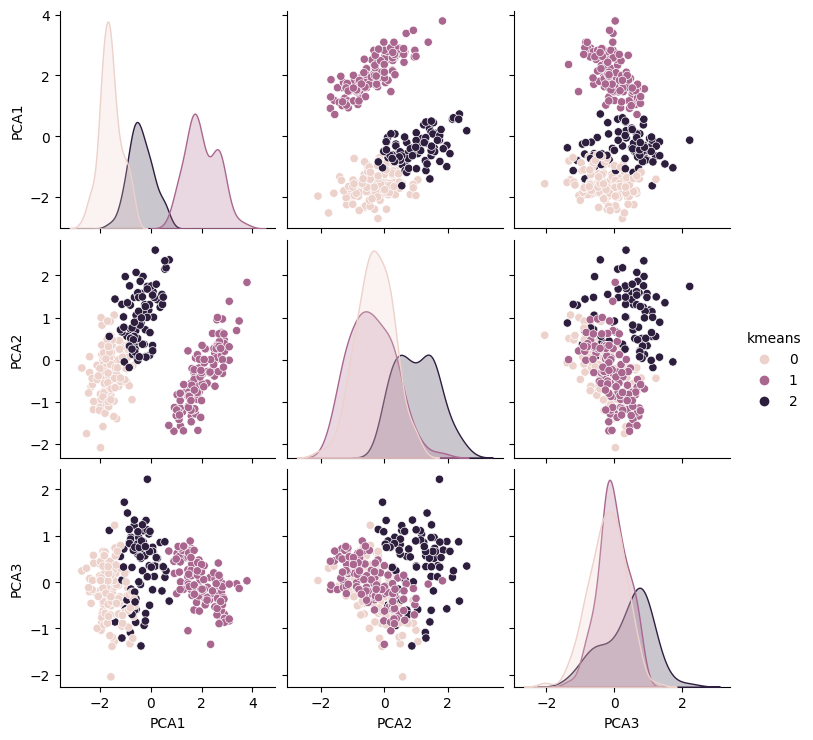

In [35]:
sns.pairplot(d,hue='kmeans')